# Seaborn

## import

In [1]:
# seabornはsnsとしてインポート
import seaborn as sns
%matplotlib inline
# 他のライブラリをインポートしておく
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

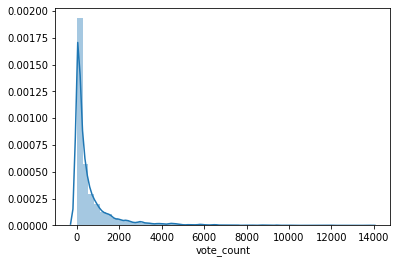

In [18]:
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
sns.distplot(df['vote_count'])

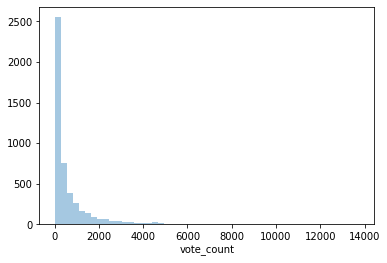

In [7]:
# normalizeではなくcountを見る
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## sns.set()

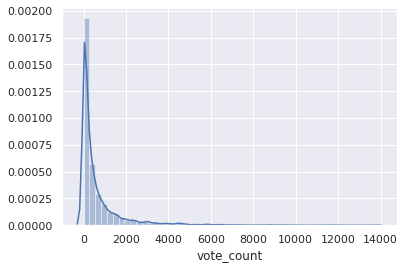

In [8]:
# スタイルが変わる
sns.set()
sns.distplot(df['vote_count'])

In [10]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

## sns.jointplot()

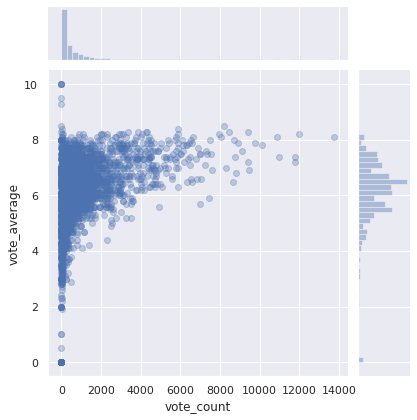

In [11]:
#　散布図+ヒストグラム
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.3)

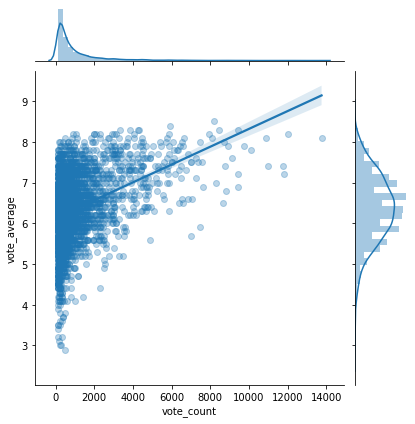

In [22]:
#　rgression
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
# 100未満は信頼性が低いとする
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count',
                  y='vote_average',
                  data=df, kind='reg',
                  joint_kws = {'scatter_kws': dict(alpha=0.3)})

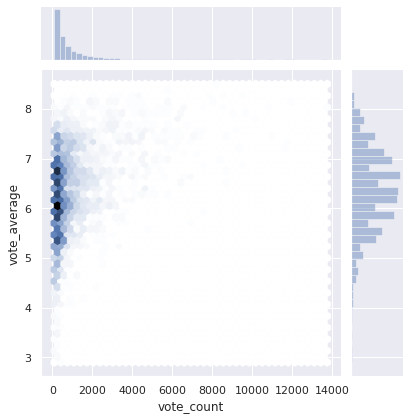

In [18]:
#　hexagonal bins
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='hex')

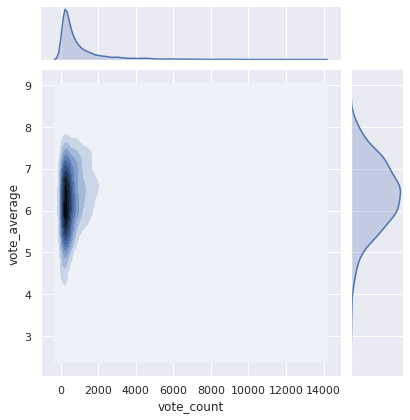

In [19]:
#　density estimates
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

## sns.pairplot()

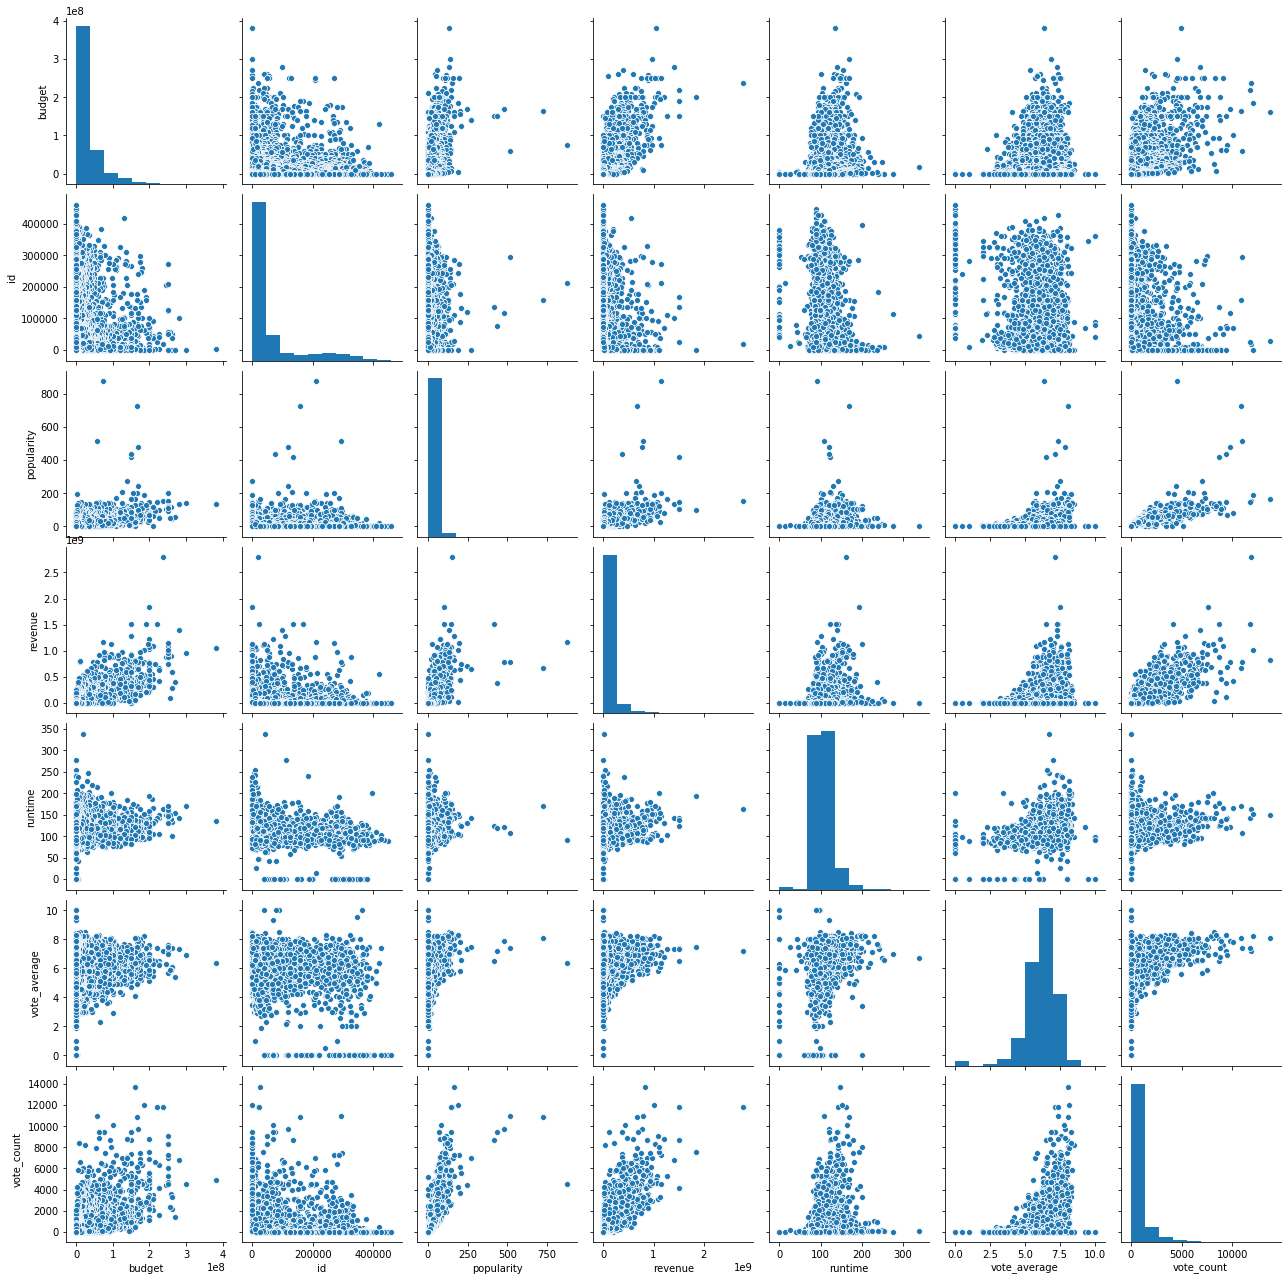

In [3]:
# DataFrameの全ての数値カラムでpairplotを作る
sns.pairplot(df)

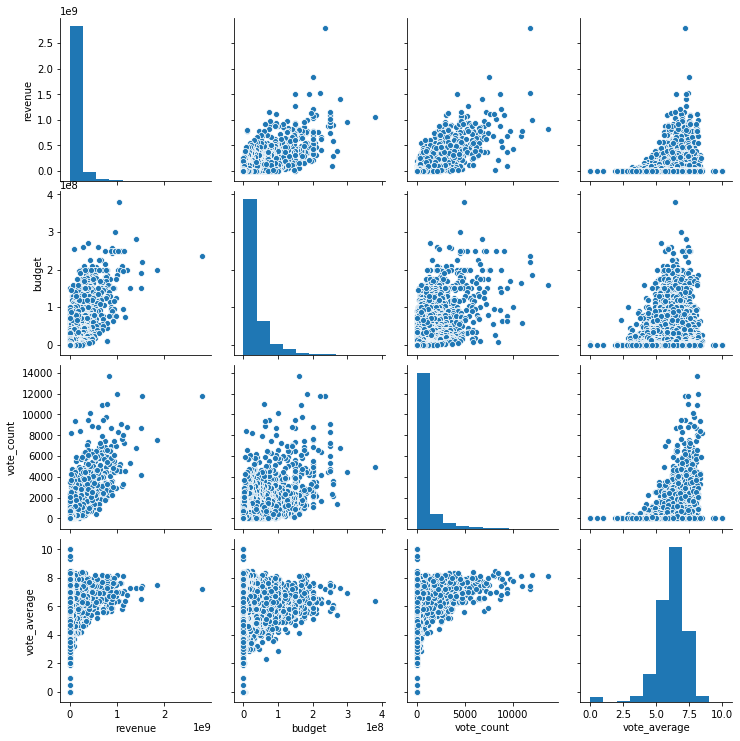

In [4]:
# 必要なカラムだけ
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

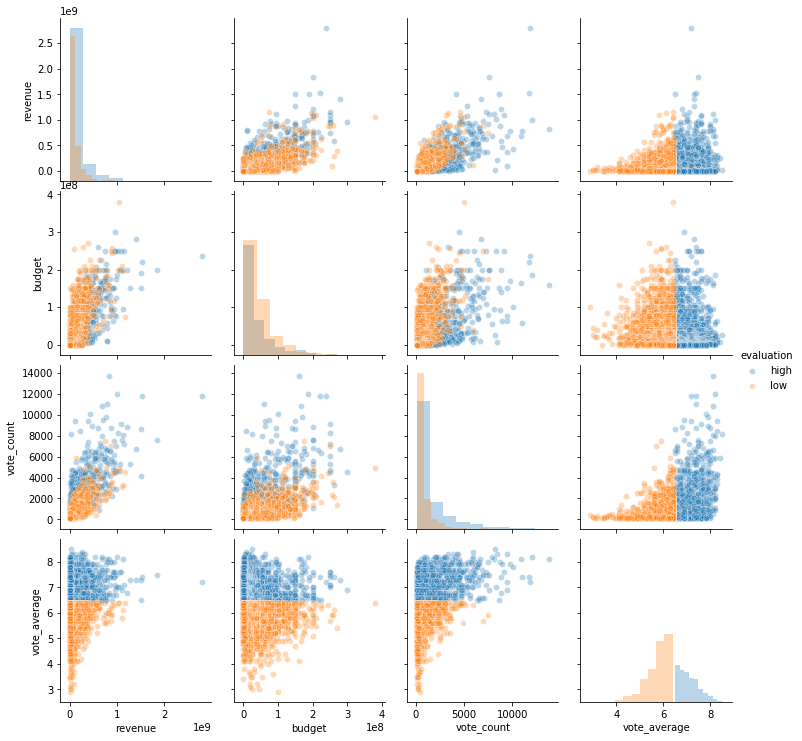

In [23]:
#hue引数で，カテゴリ別に色付け
vote_average_median = df['vote_average'].median()
# vote averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
             plot_kws={'alpha':0.3},
             diag_kind='hist',
             diag_kws={'alpha':0.3}
            )


## sns.barplot()

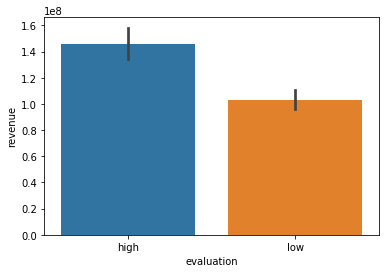

In [24]:
# 評価が高いものと低いもののrevenueのグラフ
# デフォルトでは平均値が棒グラフで表示される
sns.barplot(x='evaluation', y='revenue', data=df)

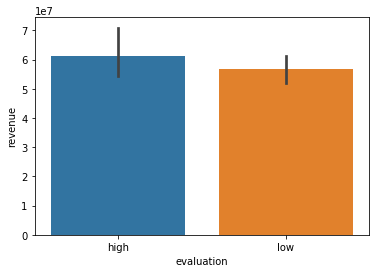

In [25]:
# estimator引数にaggregate functionを入れる
# 中央値をみる
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

## sns.countplot()

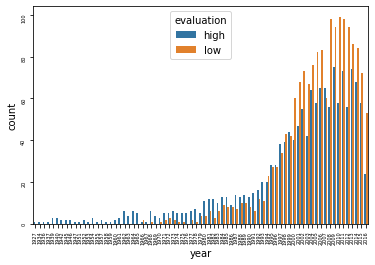

In [30]:
# 西暦別のカウント
df['year'] = df['release_date'].apply(lambda x: x[:4])
# countplotの戻り値はmatplotlibのaxes
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=5)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

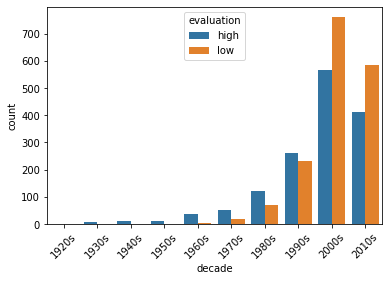

In [33]:
#　年代カラムを作る 例）2012->2010s
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')
# 直接pltで装飾することも可能
plt.xticks(rotation=45)

## sns.boxplot()

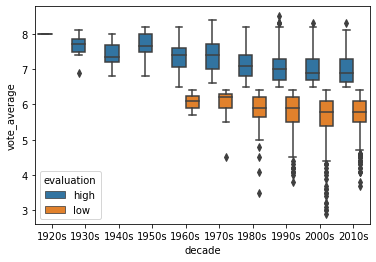

In [35]:
# 箱ひげ図(boxplot)
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'), hue='evaluation')

## sns.violinplot()

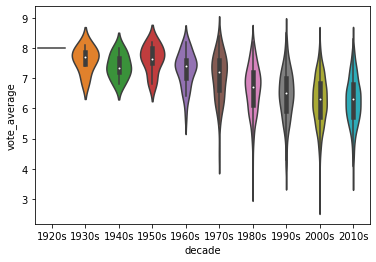

In [36]:
# violin plot 
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

## sns.swarmplot()

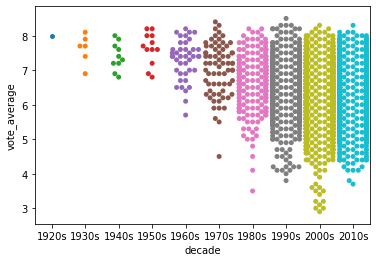

In [37]:
# swarm plot
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

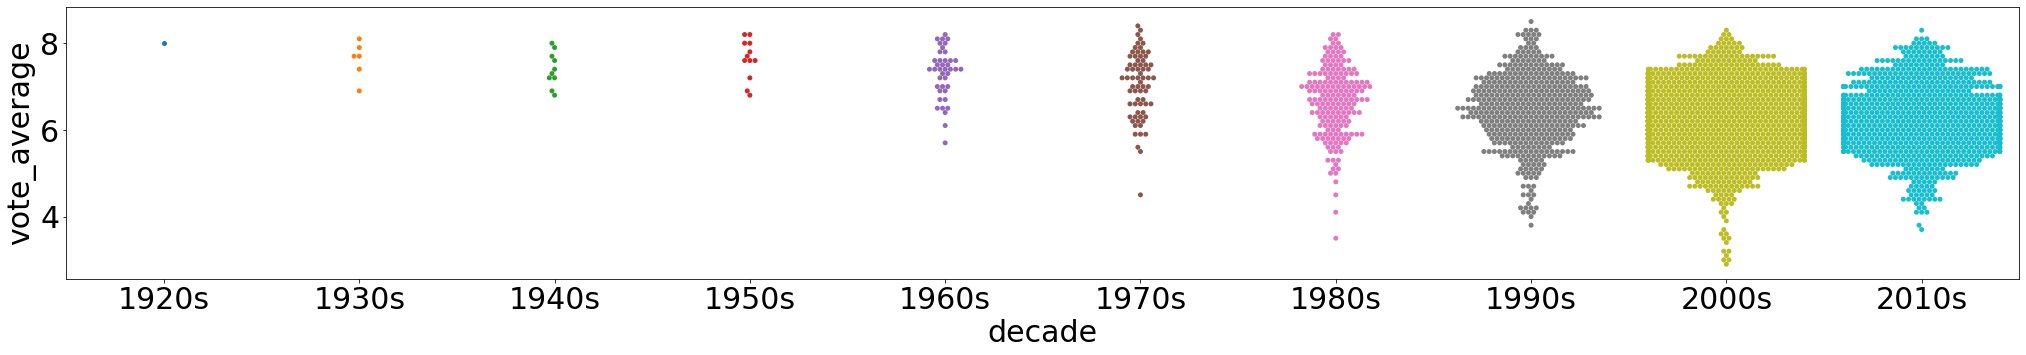

In [41]:
fig, ax = plt.subplots(figsize=(35, 5))
ax.tick_params(labelsize=30)
ax.set_xlabel('decade', fontsize=30)
ax.set_ylabel('vote_average', fontsize=30)
# axesオブジェクトを引数に入れる
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

## Heatmap
## sns.heatmap()

In [51]:
# 相関表 (Correlation Matrix)
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
# 値が0を含むrowを除く
df = df[(df!=0).all(axis=1)]
corr = df.corr()
corr

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


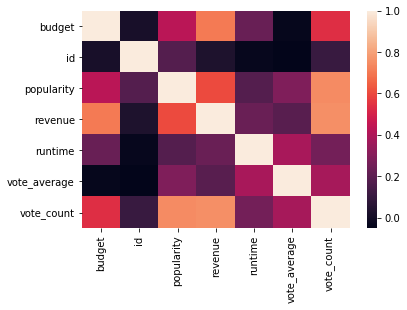

In [43]:
sns.heatmap(corr)

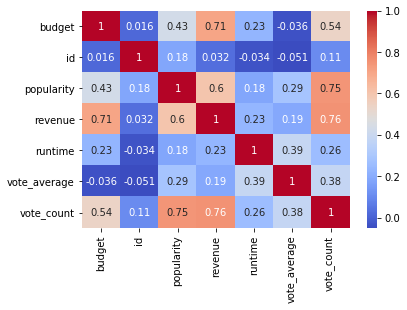

In [56]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [57]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])

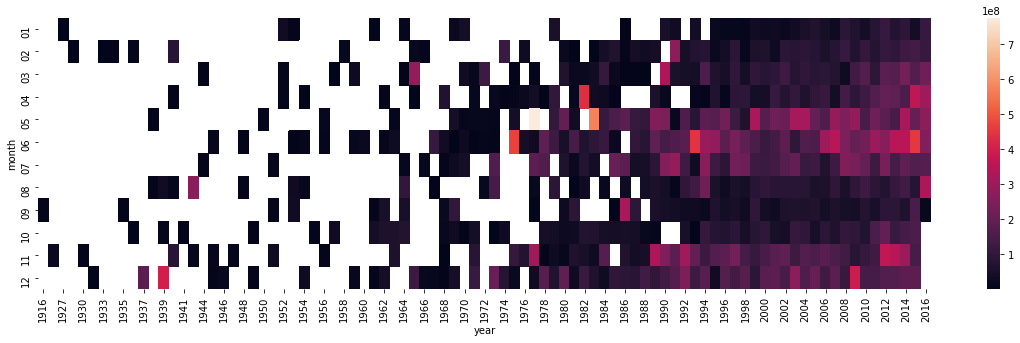

In [61]:
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(index='month', columns='year', values='revenue')
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(revenue_df, ax=ax)

## style変更
## sns.set()

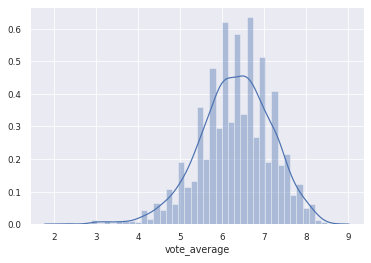

In [68]:
# context引数 : ’paper’, ‘notebook’, ‘talk’, ‘poster’
sns.set(context='paper')
# sns.set_context('poster')
sns.distplot(df['vote_average'])

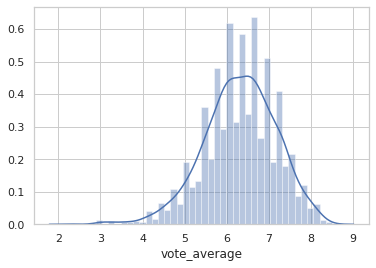

In [75]:
# style引数：‘darkgrid’, ‘whitegrid’, ‘dark’, ‘white’, ‘ticks’
sns.set(context='notebook', style='whitegrid')
# sns.set_style('whitegrid')
sns.distplot(df['vote_average'])

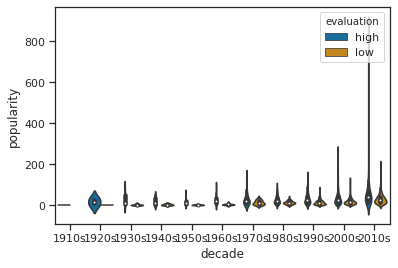

In [80]:
# palette引数 : 参考：https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html
# seabornのpalette:deep, muted, bright, pastel, dark, colorblind
sns.set(context='notebook', style='ticks', palette='colorblind')
#decadeカラムとevaluationカラムを追加
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation')

## plt.を使う

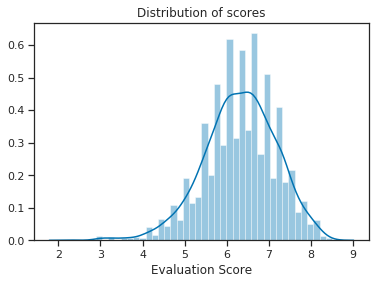

In [82]:
# snsは内部でpltを使っているので，matplotlibの装飾も同様に可能
sns.distplot(df['vote_average'])
plt.xlabel('Evaluation Score')
plt.title('Distribution of scores')
plt.savefig('saved_seaborn.png')

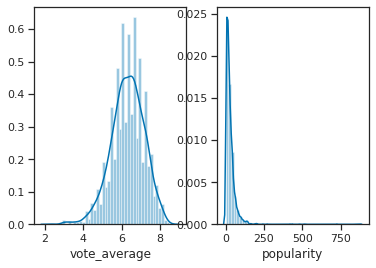

In [83]:
# axesレベルの処理も可能
fig, axes = plt.subplots(1, 2)

sns.distplot(df['vote_average'], ax=axes[0]) 
sns.distplot(df['popularity'], ax=axes[1]) 